# Import Libraries

In [4]:
import sys
sys.path.append(r'c:\users\rajpo\appdata\local\programs\python\python311\lib\site-packages')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
yf.pdr_override()

# Data Collection:

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-04,177.529999,180.139999,177.490005,177.580002,177.580002,37381500,AMAZON
2024-03-05,176.929993,176.929993,173.300003,174.119995,174.119995,37228300,AMAZON
2024-03-06,175.539993,176.460007,173.259995,173.509995,173.509995,32090900,AMAZON
2024-03-07,174.830002,177.990005,173.720001,176.820007,176.820007,34063300,AMAZON
2024-03-08,176.440002,178.789993,174.330002,175.350006,175.350006,37853500,AMAZON
2024-03-11,174.309998,174.470001,171.470001,171.960007,171.960007,28484800,AMAZON
2024-03-12,173.500000,176.759995,171.979996,175.389999,175.389999,36610600,AMAZON
2024-03-13,175.899994,177.619995,175.550003,176.559998,176.559998,30772600,AMAZON
2024-03-14,177.690002,179.529999,176.470001,178.750000,178.750000,43705800,AMAZON


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2023-03-17 to 2024-03-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


In [9]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [10]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

# EDA:

In [11]:
def plot_company_frequency(df,feature):
    company_counts = df[feature].value_counts()
    plt.figure(figsize=(8, 4))
    company_counts.plot(kind='bar', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Each {feature}')
    plt.show()

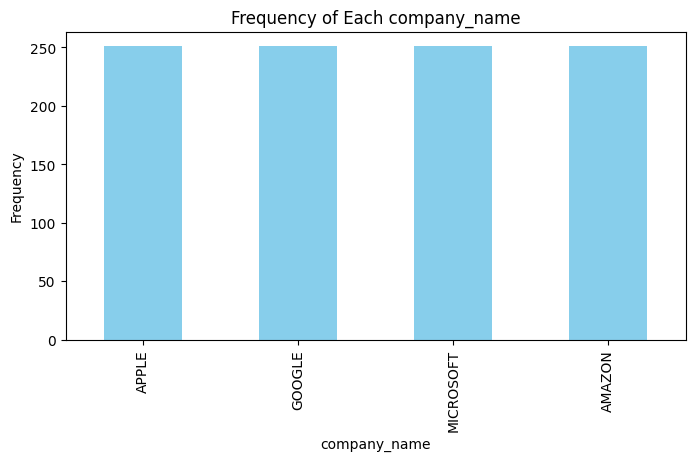

In [12]:
plot_company_frequency(df,'company_name')

# Historical view of the closing price

In [13]:
def hist_view(feature,company_list,title):
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)
    
    for i, company in enumerate(company_list, 1):
        plt.subplot(2, 2, i)
        company[feature].plot()
        plt.ylabel(feature)
        plt.xlabel(None)
        plt.title(f"{title} of {tech_list[i - 1]}")
        
    plt.tight_layout()

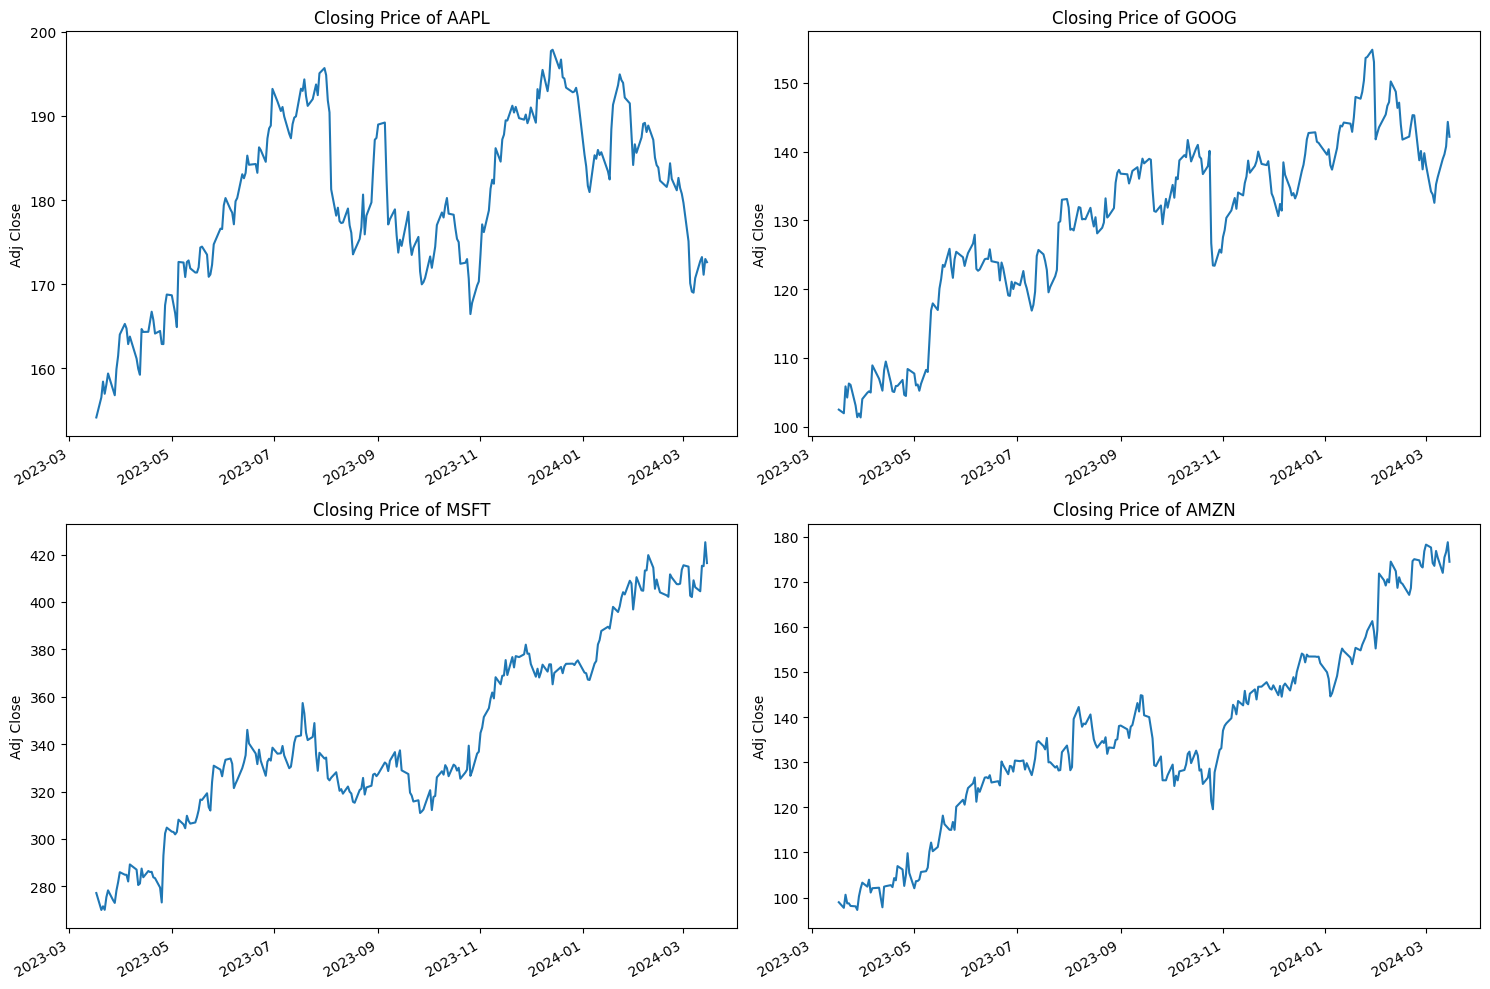

In [14]:
hist_view('Adj Close',company_list,'Closing Price')

# Historical View of Volume of sales

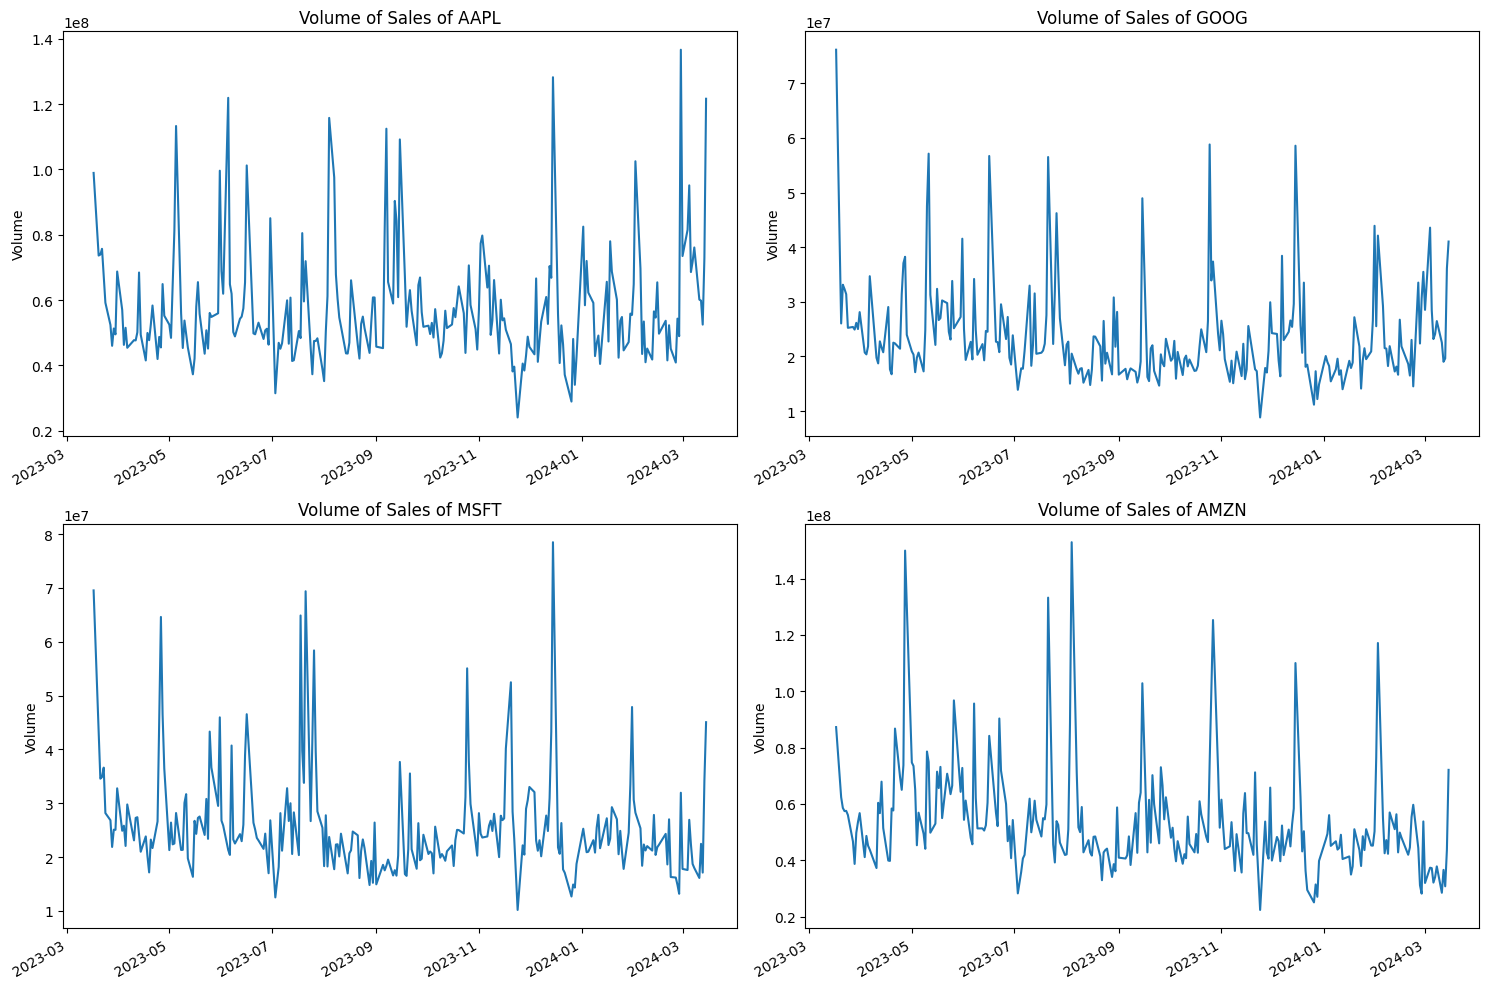

In [15]:
hist_view('Volume',company_list,'Volume of Sales')

# Historical View of Opening Prices

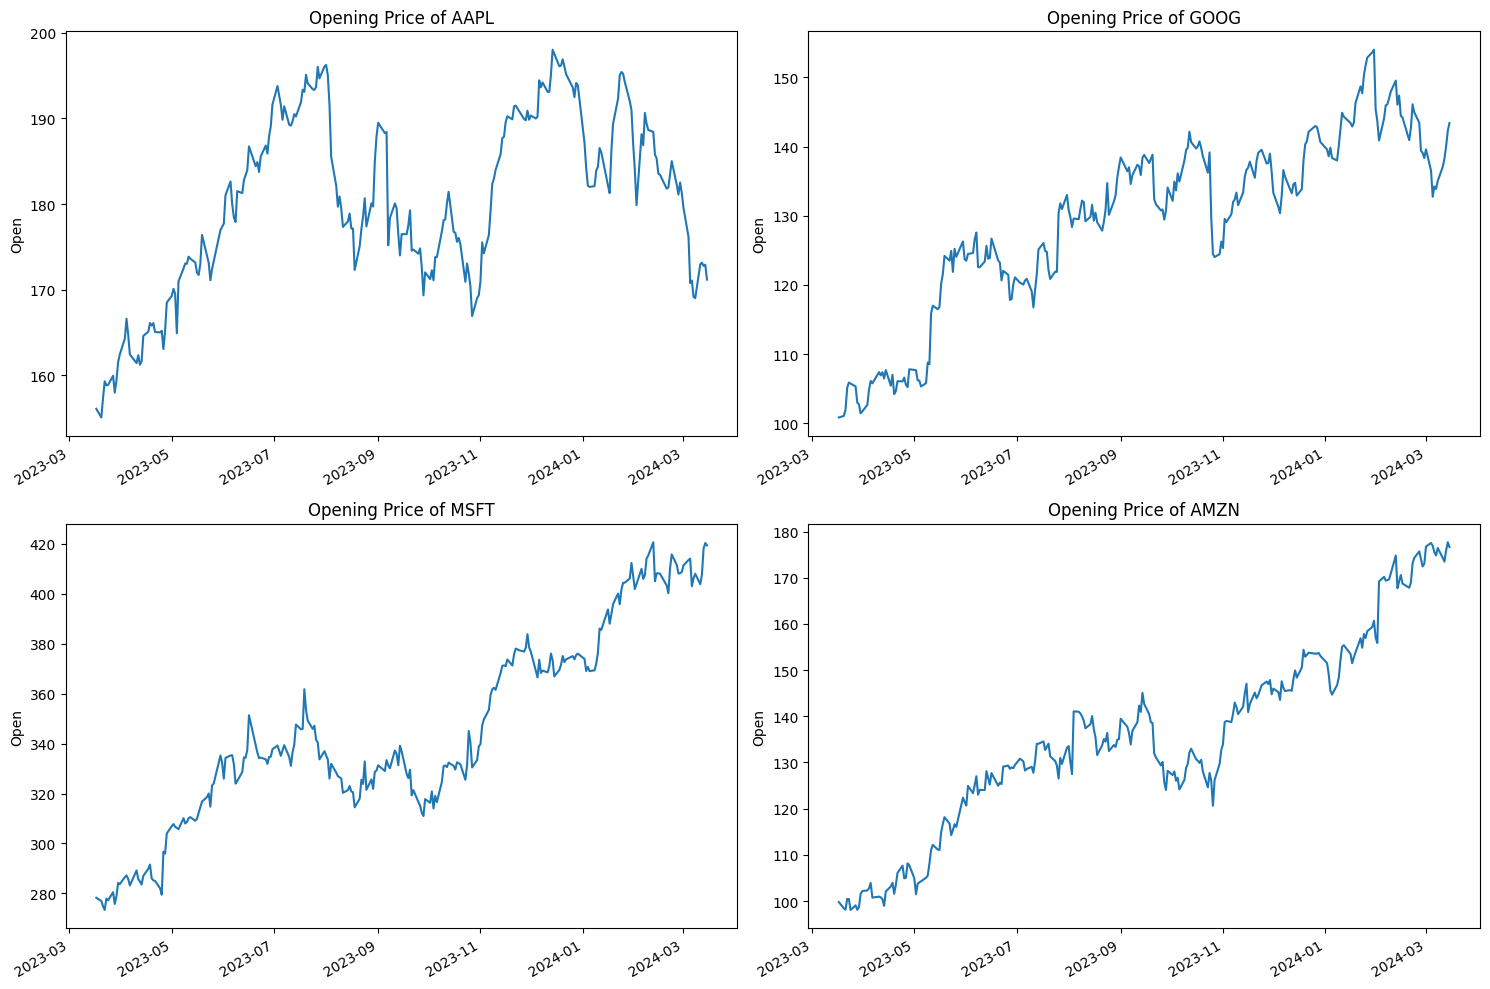

In [16]:
hist_view('Open',company_list,'Opening Price')

In [17]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name'], dtype='object')

# Moving average of the various stocks

Moving Average smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [18]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

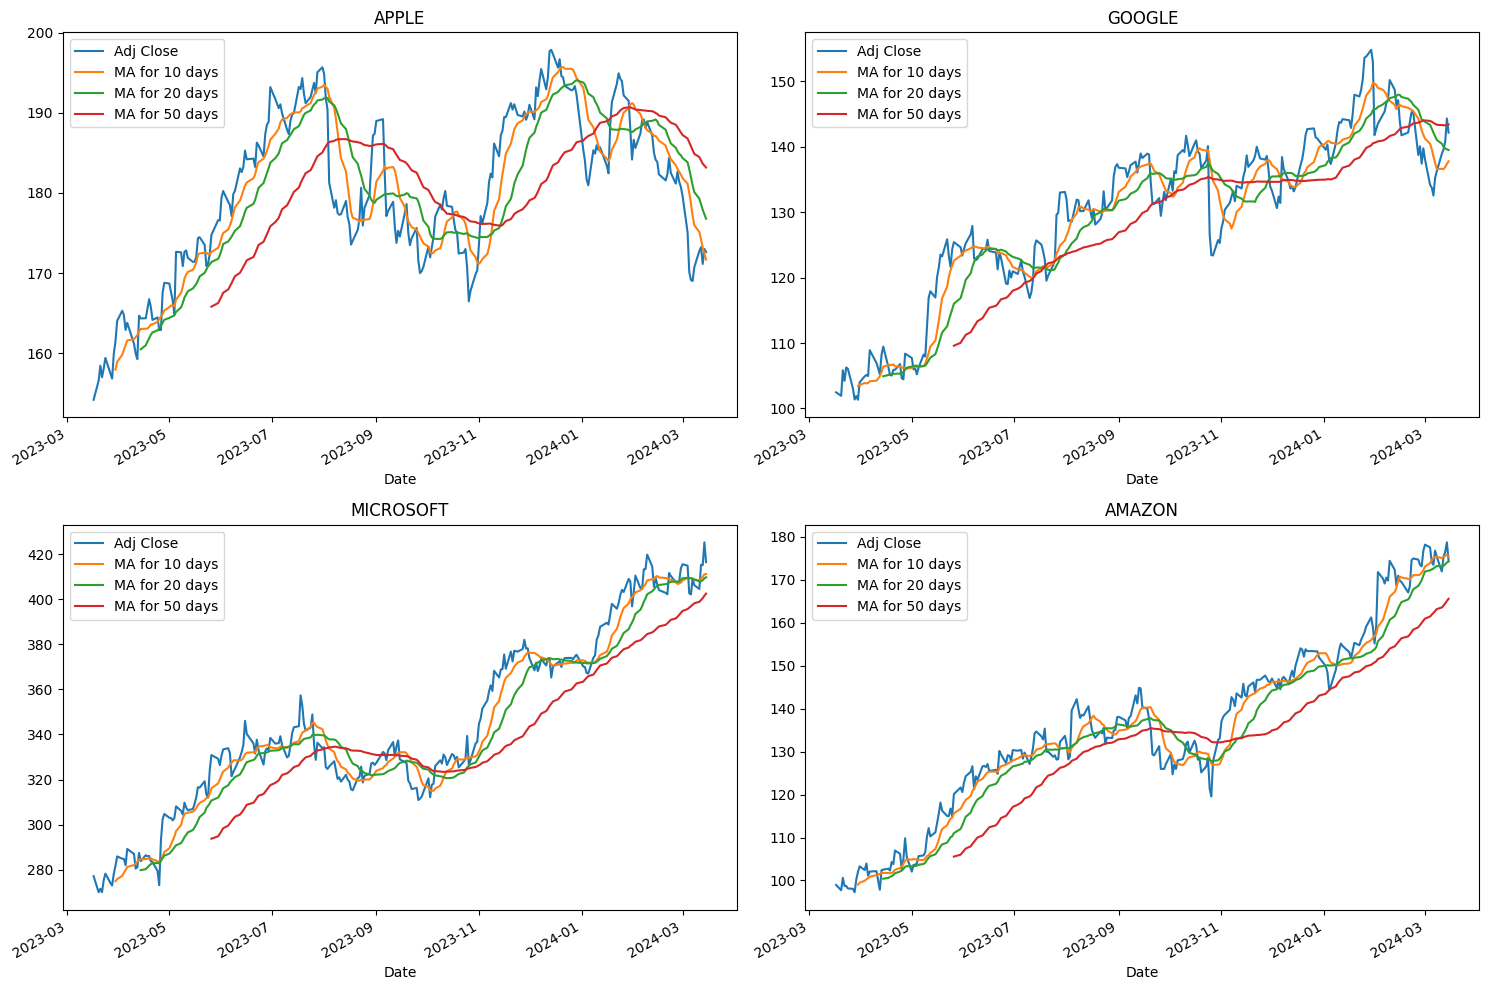

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

**Comparing moving average lines helps us see how stocks are performing over time. It's like looking at a trend to see if a stock is likely to go up or down**

# Correlation between stocks

In [20]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.tail()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-03-11,0.011832,-0.019333,0.019444,-0.004185
2024-03-12,0.002779,0.019946,0.004894,0.026599
2024-03-13,-0.012123,0.006671,0.008237,-0.000433
2024-03-14,0.010927,0.012404,0.025360,0.024380
2024-03-15,-0.002197,-0.024224,-0.015034,-0.020695


Text(0.5, 1.0, 'Correlation of stock closing price')

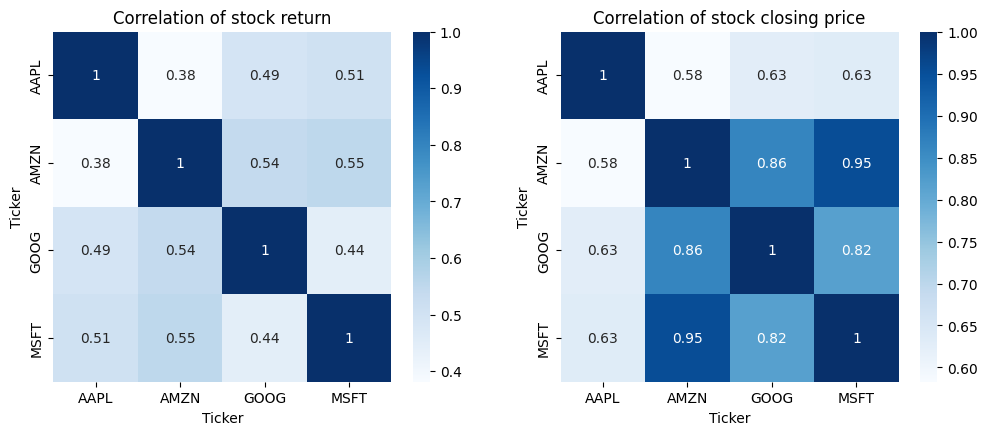

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap=plt.cm.Blues)
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap=plt.cm.Blues)
plt.title('Correlation of stock closing price')

**The correlation matrix shows how closely the price movements of different stocks are related, helping to identify potential trends or diversification opportunities within a portfolio**

# Scatter Plot for correlation between stocks

c:\users\rajpo\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


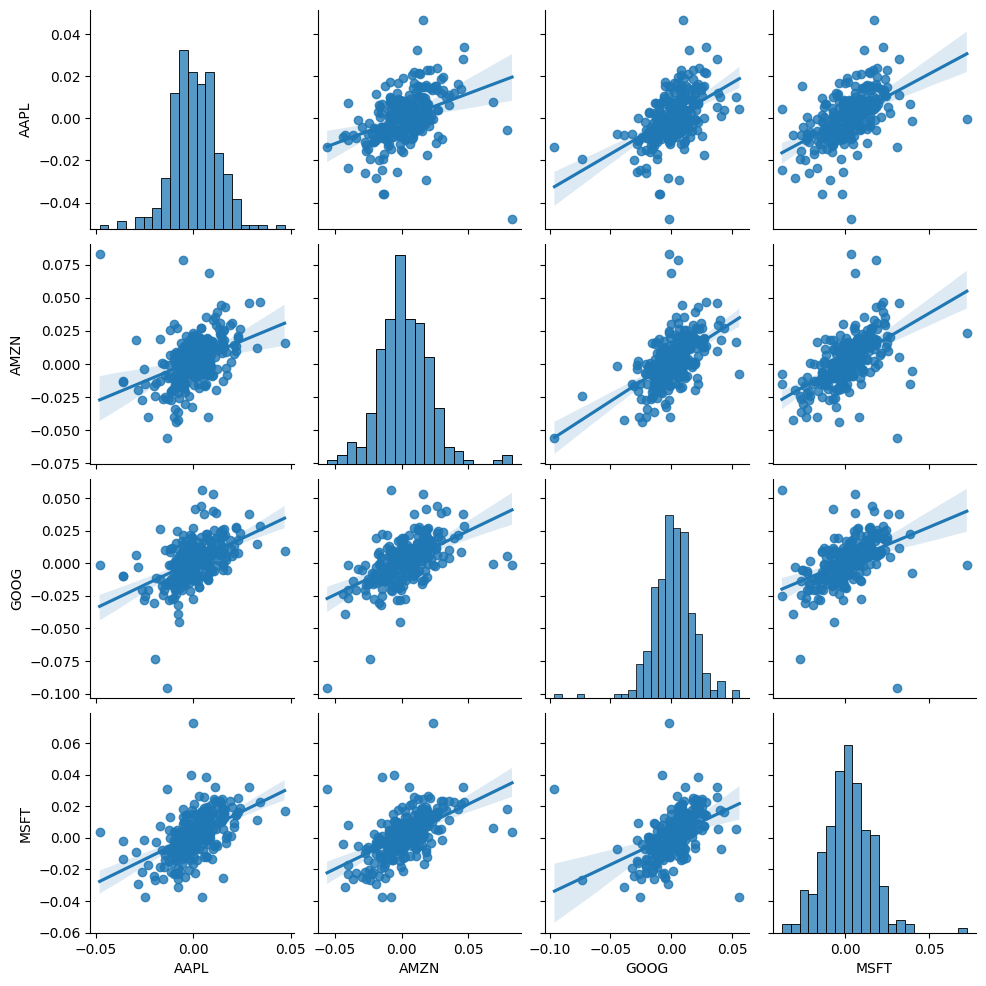

In [26]:
sns.pairplot(tech_rets, kind='reg')

# Value put at risk through investment, comapred to different stocks

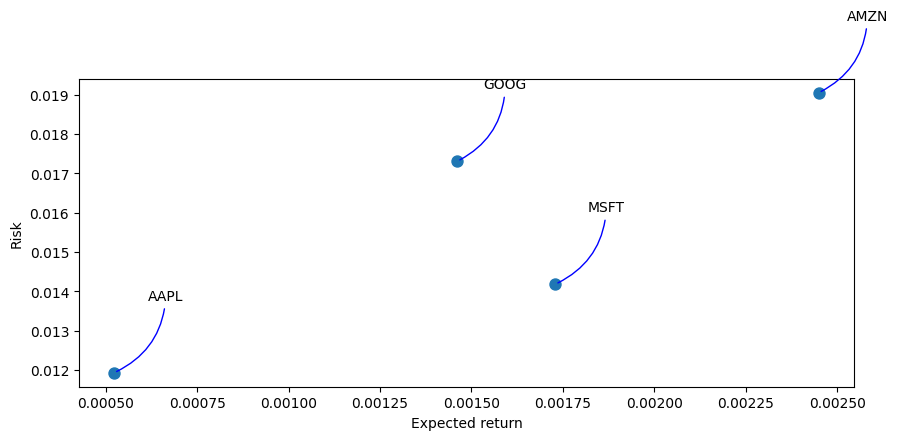

In [22]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

**We can see that with Apple, we can expect less return if we play safe and vice versa for Amazon**

# Growth Rate

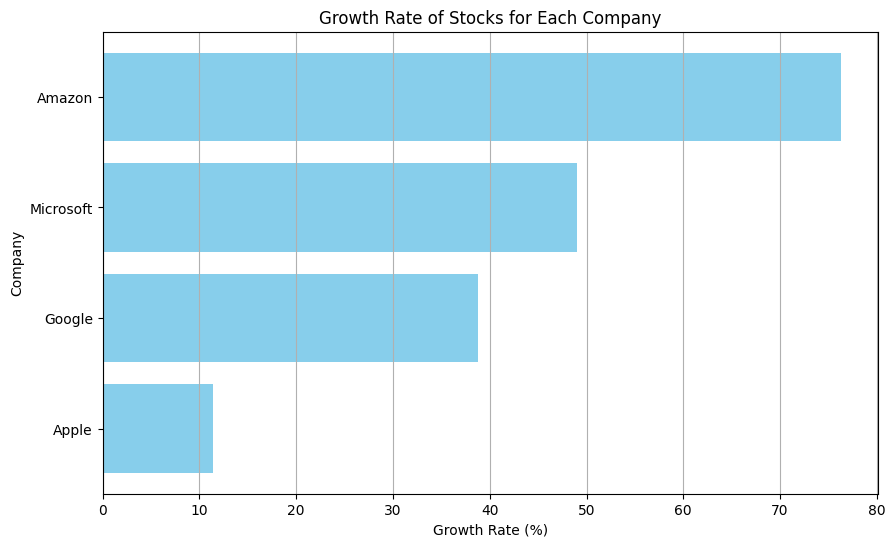

In [23]:
list_df = [company_list[i] for i in range(0,4)]  # list of dataframes for each company
companies = ['Apple','Google','Microsoft','Amazon']  # unique company names

# Calculate growth rate metric
mini = [df['Close'].iloc[0] for df in list_df]
maxi = [df['Close'].iloc[-1] for df in list_df]
diff = np.array(maxi) - np.array(mini)
growth = (diff / np.array(mini)) * 100
growth_list = growth.tolist()

# Create DataFrame for plotting
growth_df = pd.DataFrame({'Company': companies, 'Growth Rate': growth_list})

# Plot horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(growth_df['Company'], growth_df['Growth Rate'], color='skyblue')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Company')
plt.title('Growth Rate of Stocks for Each Company')
plt.grid(axis='x')
plt.show()

# Daily return on average of stock

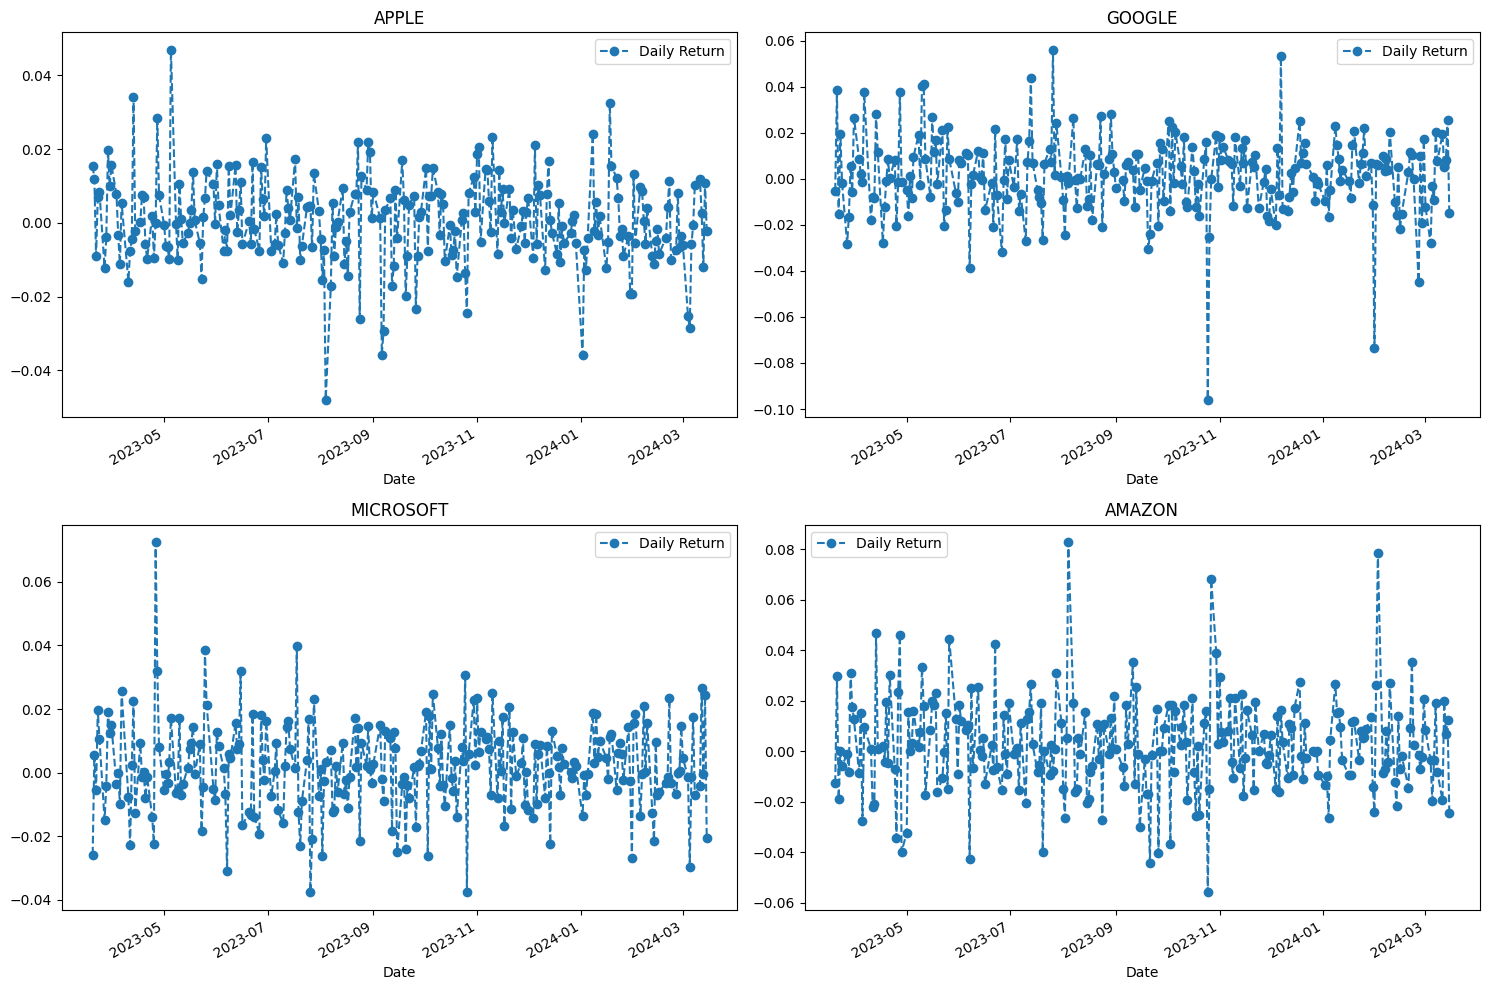

In [24]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

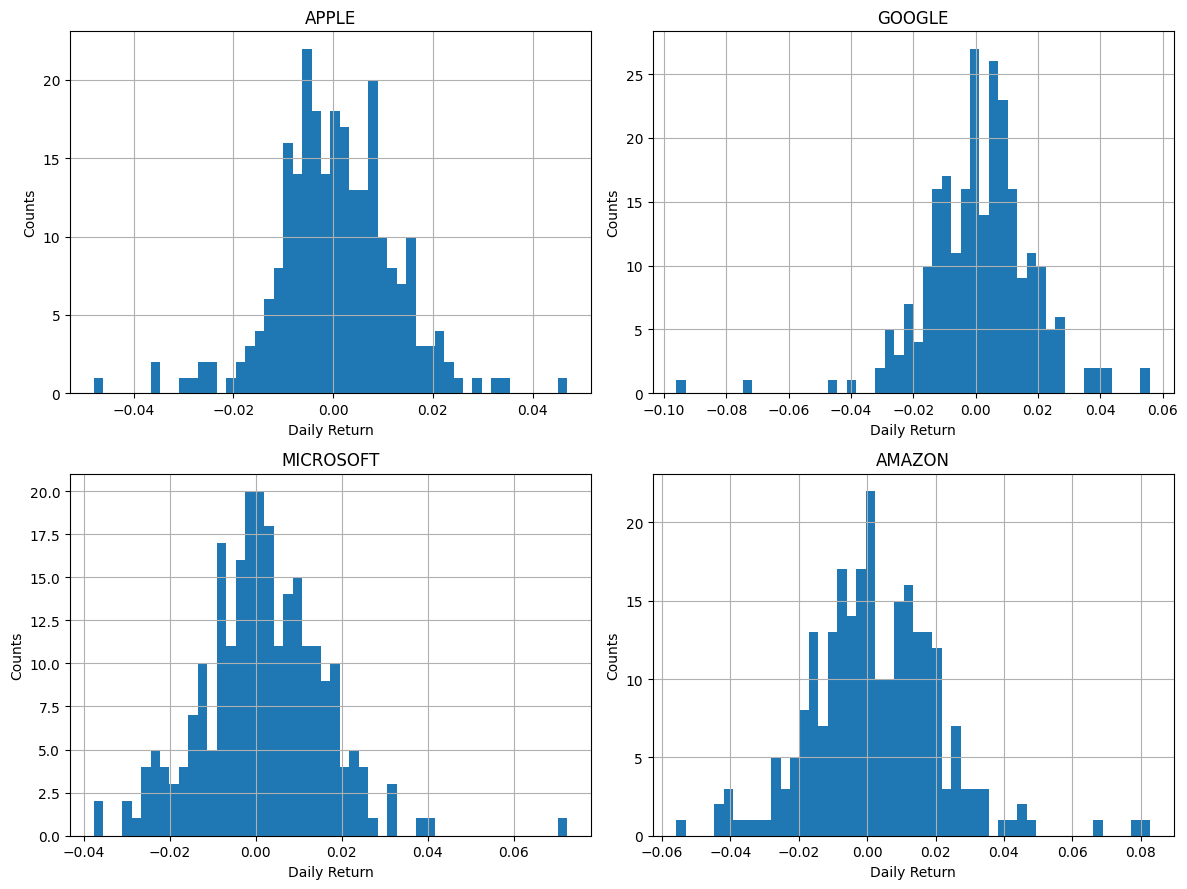

In [25]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()